<a href="https://colab.research.google.com/github/DonDairon/Analisis-de-datos/blob/main/Call_nominations_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
import pycountry

In [ ]:
pip install matplotlib

In [ ]:
pip install pycountry pycountry_convert

Importando librerias y conectando a drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importando databases de RAFF.

In [3]:
archivo_excel = '/content/drive/MyDrive/Call nominatios/RASFF/RASFF_window_results (16).xlsx'

In [9]:
df = pd.read_excel(archivo_excel)

In [10]:
df.head()

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards
0,2024.7049,fruits and vegetables,food,Chlorpyrifos in tomato from Turkiye,23-09-2024 11:05:03,Croatia,border rejection notification,potential risk,Croatia,NaN,NaN,Türkiye,Türkiye,chlorpyrifos-methyl
1,2024.7055,herbs and spices,food,Plaguicidas en azafrán de Irán. Pesticides in ...,20-09-2024 14:57:49,Spain,border rejection notification,serious,NaN,NaN,NaN,"Iran,Spain",Iran,chlorpyrifos unauthorised substance
2,2024.7013,fruits and vegetables,food,dimethomorph and dithiocarbamates (as cs2) in ...,20-09-2024 11:34:45,Netherlands,border rejection notification,not serious,NaN,NaN,NaN,"Netherlands,Vietnam",Vietnam,"dimethomorph ,dithiocarbamates"
3,2024.6646,fruits and vegetables,food,Pesticide Residues in and Labelling deficienci...,19-09-2024 15:27:28,Germany,information notification for attention,serious,Germany,"Czech Republic,INFOSAN",NaN,"Czech Republic,Germany",Vietnam,"acetamiprid ,buprofezin ,chlorfenapyr ,dith..."
4,2024.6989,fruits and vegetables,food,difenoconazole in Colombian passiflora,19-09-2024 13:26:04,Netherlands,border rejection notification,no risk,NaN,Colombia,NaN,"Colombia,Netherlands",Colombia,difenoconazole


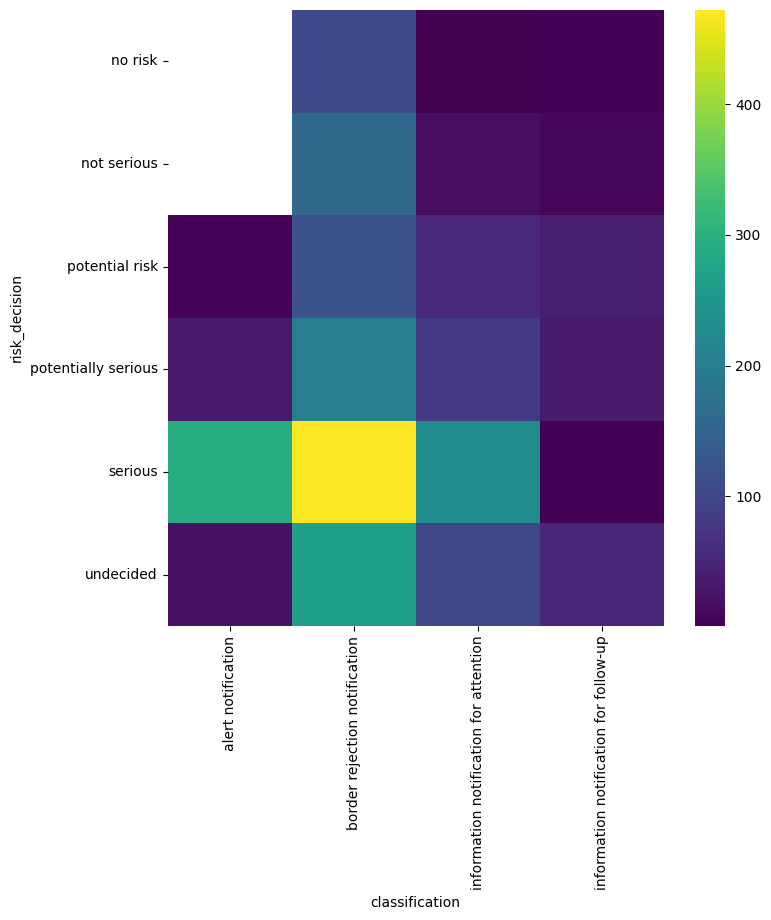

In [40]:
# @title classification vs risk_decision

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['risk_decision'].value_counts()
    for x_label, grp in df.groupby('classification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('classification')
_ = plt.ylabel('risk_decision')

Graficando paises de origen

Agregando informacion para filtrar por continente de origen

In [37]:
# Función para convertir el país a continente
def obtener_continente(pais):
    try:
        # Obtener el código Alpha-2 del país usando pycountry
        codigo_pais = pycountry.countries.lookup(pais).alpha_2
        # Obtener el código del continente a partir del código del país
        codigo_continente = pc.country_alpha2_to_continent_code(codigo_pais)
        # Convertir el código del continente al nombre completo del continente
        continentes = {
            'AF': 'Africa',
            'NA': 'North America',
            'SA': 'South America',
            'AS': 'Asia',
            'EU': 'Europe',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continentes.get(codigo_continente)
    except Exception as e:
        return 'Desconocido'  # Retornar 'Desconocido' si no se encuentra el país

# Crear una nueva columna 'Continente' aplicando la función
df['Continente'] = df['origin'].apply(obtener_continente)

# Mostrar el DataFrame con la nueva columna
(df.head())

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards,Continente
0,2024.7049,fruits and vegetables,food,Chlorpyrifos in tomato from Turkiye,23-09-2024 11:05:03,Croatia,border rejection notification,potential risk,Croatia,NaN,NaN,Türkiye,Türkiye,chlorpyrifos-methyl,Asia
1,2024.7055,herbs and spices,food,Plaguicidas en azafrán de Irán. Pesticides in ...,20-09-2024 14:57:49,Spain,border rejection notification,serious,NaN,NaN,NaN,"Iran,Spain",Iran,chlorpyrifos unauthorised substance,Asia
2,2024.7013,fruits and vegetables,food,dimethomorph and dithiocarbamates (as cs2) in ...,20-09-2024 11:34:45,Netherlands,border rejection notification,not serious,NaN,NaN,NaN,"Netherlands,Vietnam",Vietnam,"dimethomorph ,dithiocarbamates",Asia
3,2024.6646,fruits and vegetables,food,Pesticide Residues in and Labelling deficienci...,19-09-2024 15:27:28,Germany,information notification for attention,serious,Germany,"Czech Republic,INFOSAN",NaN,"Czech Republic,Germany",Vietnam,"acetamiprid ,buprofezin ,chlorfenapyr ,dith...",Asia
4,2024.6989,fruits and vegetables,food,difenoconazole in Colombian passiflora,19-09-2024 13:26:04,Netherlands,border rejection notification,no risk,NaN,Colombia,NaN,"Colombia,Netherlands",Colombia,difenoconazole,South America


Graficando paises con mayor numero de violaciones por continente

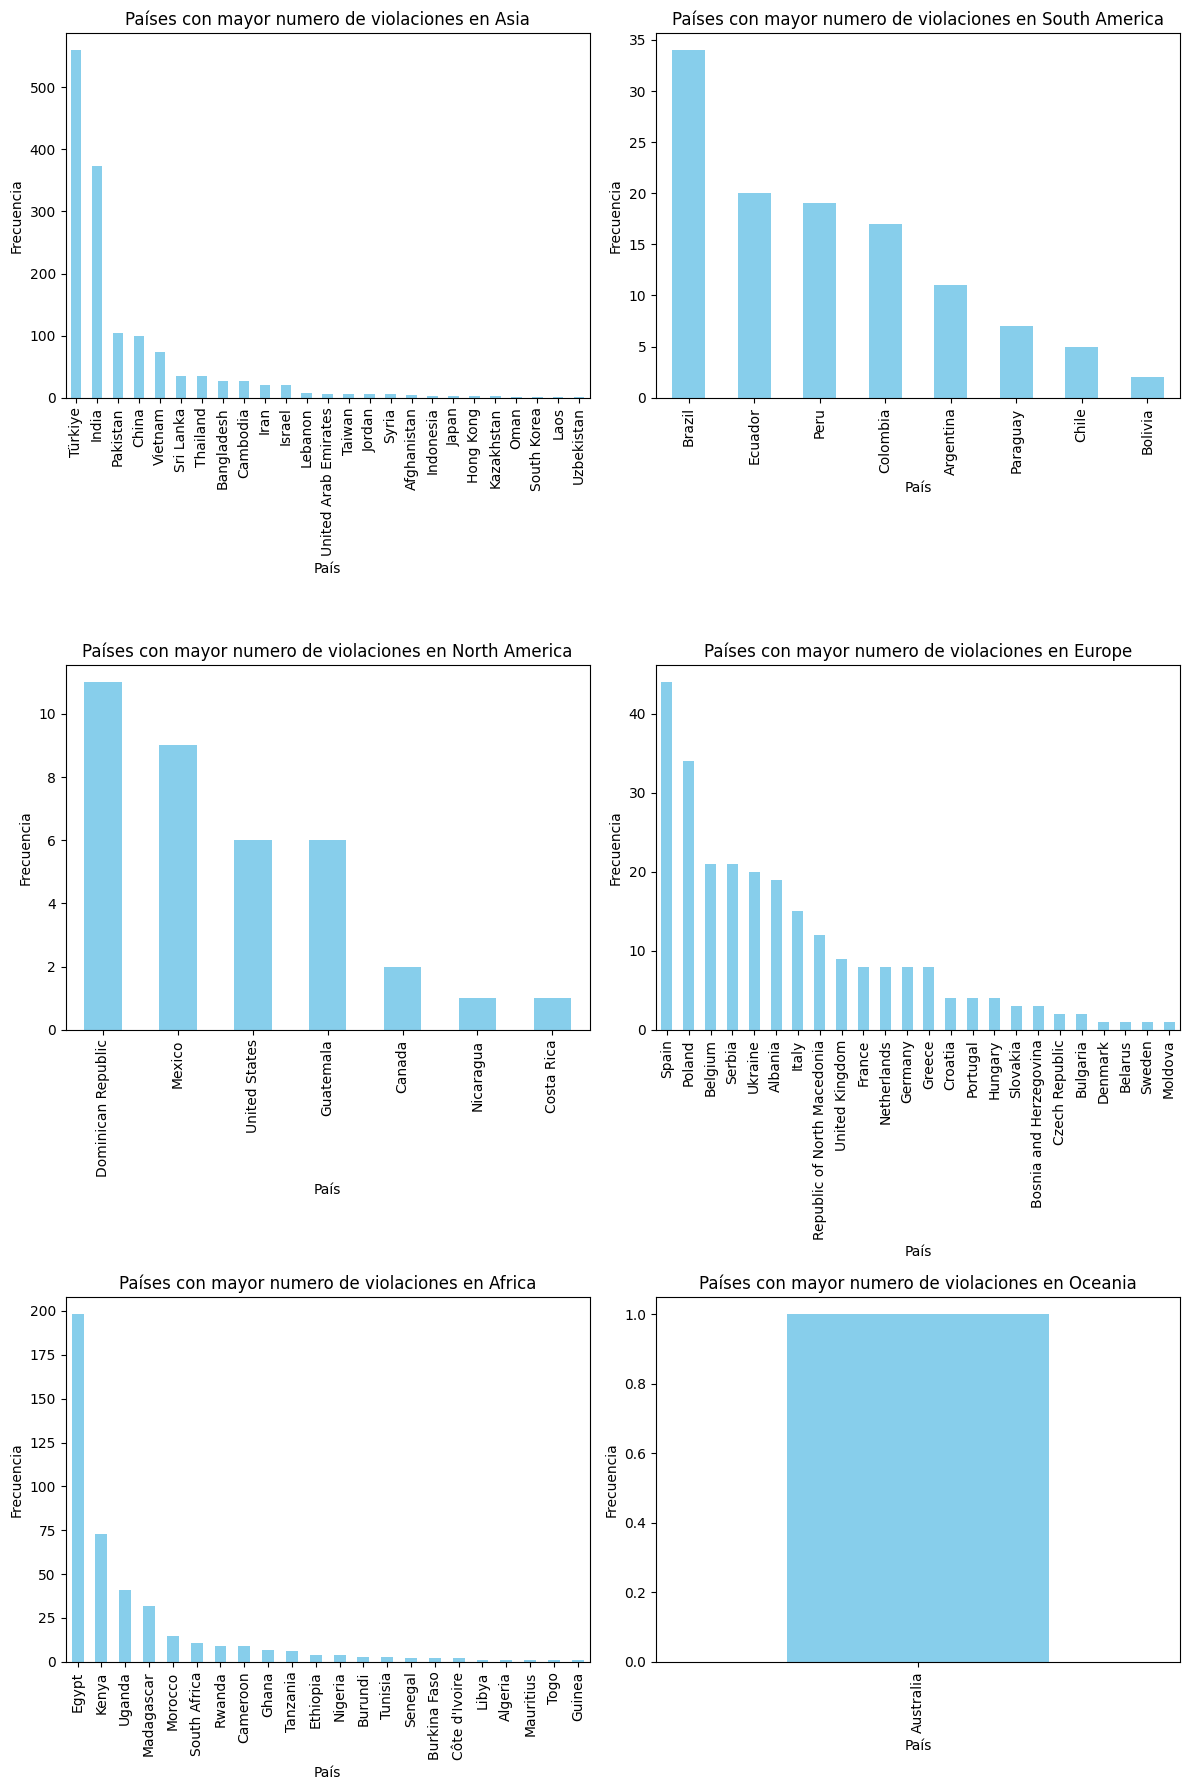

In [44]:
# Obtener la lista de continentes únicos
continentes_unicos = df['Continente'].unique()

# Filtrar continentes que no son desconocidos
continentes_validos = [continente for continente in continentes_unicos if continente != 'Desconocido']

# Definir el número de subgráficas
num_continentes = len(continentes_validos)
num_columnas = 2  # Número de columnas en las subgráficas
num_filas = (num_continentes + num_columnas - 1) // num_columnas  # Calcular filas necesarias

# Crear una figura con subgráficas
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 6 * num_filas))
axs = axs.flatten()  # Aplanar la matriz de subgráficas para facilitar el acceso

# Graficar la frecuencia de países en cada continente
for i, continente in enumerate(continentes_validos):
    # Filtrar el DataFrame por continente
    df_continente = df[df['Continente'] == continente]

    # Contar la frecuencia de países dentro del continente
    conteo_paises = df_continente['origin'].value_counts()

    # Crear la gráfica para el continente en la subgráfica correspondiente
    conteo_paises.plot(kind='bar', ax=axs[i], legend=False, color='skyblue')

    # Añadir títulos y etiquetas
    axs[i].set_title(f'Países con mayor numero de violaciones en {continente}')
    axs[i].set_xlabel('País')
    axs[i].set_ylabel('Frecuencia')

# Ocultar subgráficas restantes que no se utilizan
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Graficando


In [ ]:
# Obtener la lista de continentes únicos
continentes_unicos = df['Continente'].unique()

# Filtrar continentes que no son desconocidos
continentes_validos = [continente for continente in continentes_unicos if continente != 'Desconocido']

# Definir el número de subgráficas
num_continentes = len(continentes_validos)
num_columnas = 2  # Número de columnas en las subgráficas
num_filas = (num_continentes + num_columnas - 1) // num_columnas  # Calcular filas necesarias

# Crear una figura con subgráficas
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 6 * num_filas))
axs = axs.flatten()  # Aplanar la matriz de subgráficas para facilitar el acceso

# Graficar la frecuencia de países en cada continente
for i, continente in enumerate(continentes_validos):
    # Filtrar el DataFrame por continente
    df_continente = df[df['Continente'] == continente]

    # Contar la frecuencia de países dentro del continente
    conteo_paises = df_continente['origin'].value_counts()

    # Crear la gráfica para el continente en la subgráfica correspondiente
    conteo_paises.plot(kind='bar', ax=axs[i], legend=False, color='skyblue')

    # Añadir títulos y etiquetas
    axs[i].set_title(f'Países con mayor numero de violaciones en {continente}')
    axs[i].set_xlabel('País')
    axs[i].set_ylabel('Frecuencia')

# Ocultar subgráficas restantes que no se utilizan
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Buscando el motivo de reporte que mas se repite

In [46]:
subject_repetidos = df['subject'].value_counts()
subject_repetidos.head(10)

,count
subject,
Chlorpyrifos in black eyed beans from Madagascar,9
Thiamethoxam and Tricyclazole in rice from India,9
Prochloraz in fresh lemons from Turkey,9
Acetamiprid in fresh pepper from Turkey,8
Multiple pesticide residues in cumin seeds from India,7
Acetamiprid in rice from Pakistan,7
Acephate in green beans from Kenya,7
Tricyclazole in rice from India,6
Chlorpyrifos-methyl in fresh pepper from Turkey,6


Buscando molecula que mas se repite

In [48]:
hazars_repetidos = df['hazards'].value_counts()
hazars_repetidos.head(10)

,count
hazards,
chlorpyrifos unauthorised substance,203
chlorpyrifos,171
chlorpyrifos-methyl unauthorised substance,97
ethylene oxide,85
acetamiprid,81
chlorpyrifos-methyl,61
chlorpyriphos-ethyl,41
formetanate,41
pesticide residues,40


Buscando cuantas veces se encuentra chlorpyrifos

In [50]:
conteo_chlorpyrifos = df['hazards'].str.contains('chlorpyrifos', case=False, na=False).sum()
print(f"'chlorpyrifos' se repite: {conteo_chlorpyrifos} veces")

'chlorpyrifos' se repite: 823 veces


In [14]:
(df[df['subject'] == 'Chlorpyrifos in black eyed beans from Madagascar'])

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards
836,2023.7518,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,02-11-2023 18:14:12,France,border rejection notification,potentially serious,NaN,NaN,NaN,"France,Madagascar",Madagascar,chlorpyrifos unauthorised substance
842,2023.7445,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,31-10-2023 16:17:23,France,border rejection notification,potentially serious,NaN,Madagascar,NaN,"France,Madagascar",Madagascar,chlorpyrifos
921,2023.6561,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,28-09-2023 11:26:53,France,border rejection notification,potentially serious,NaN,NaN,NaN,"France,Madagascar",Madagascar,chlorpyrifos
1195,2023.3435,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,24-05-2023 08:00:17,Greece,border rejection notification,serious,NaN,NaN,NaN,"Greece,Madagascar",Madagascar,chlorpyrifos unauthorised substance
1652,2022.5714,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,03-10-2022 13:12:43,Greece,border rejection notification,undecided,NaN,NaN,NaN,"Greece,Madagascar,United Arab Emirates",Madagascar,chlorpyrifos unauthorised substance
1982,2022.2171,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,12-04-2022 13:39:05,Greece,border rejection notification,undecided,NaN,NaN,NaN,"France,Greece,Madagascar,Seychelles",Madagascar,chlorpyrifos
1998,2022.2019,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,06-04-2022 07:43:35,Greece,border rejection notification,undecided,NaN,NaN,NaN,"Greece,India,Madagascar",Madagascar,chlorpyrifos
2055,2022.1743,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,24-03-2022 11:12:27,Greece,border rejection notification,undecided,NaN,NaN,NaN,"Greece,Madagascar",Madagascar,chlorpyrifos
2085,2022.1512,fruits and vegetables,food,Chlorpyrifos in black eyed beans from Madagascar,15-03-2022 13:48:24,Greece,border rejection notification,undecided,NaN,NaN,NaN,"Greece,Madagascar",Madagascar,chlorpyrifos


Importando segunda base de datos


In [16]:
FDACPR = pd.read_csv('/content/drive/MyDrive/Call nominatios/FDA/CountryProductResidueData2022.txt', sep='\t')

In [17]:
FDACPR.head(10)

,Year,Country,ProdCode,ProdName,ResName,Spls.,Spls%,Pos.,Pos%,Vio.,Vio%,Trace.,Mean,Minimum,Median,90th,Maximum
0,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,3,5,6-TETRACHLOROANILINE",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
1,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,4,5-T METHYL ESTER",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
2,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,4-D",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
3,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,4-D METHYL ESTER",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
4,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,4-DB",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
5,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,4-DB METHYL ESTER",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
6,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,6-DICHLOROBENZAMIDE",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
7,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","2,6-DIPN",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
8,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...","3,4-DICHLOROANILINE",1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.
9,2022,Afghanistan,02D02,"Rice, Plain (White or Polished) Processed (Pac...",4-CPA,1,100.0,0,0.0,0,0.0,0,0.0,0.,0.,0.,0.


Organizando paises con mayor numero de violaciones. Se muestra Pais, producto, plaguicida del que se encontraron residuos y el numero de violaciones reportadas.

In [19]:
FDACPR_filtrado = FDACPR[FDACPR['Vio.'] > 0]
agrupado = FDACPR_filtrado.groupby(['Country', 'ProdName', 'ResName'], as_index=False)['Vio.'].sum()
idx_max = agrupado.groupby('Country')['Vio.'].idxmax()
resultado = agrupado.loc[idx_max]
resultado = resultado.rename(columns={'Vio.': 'Max_Violaciones'})
print("\nProducto con Mayor Número de Violaciones por País:")
resultado = resultado.sort_values(by='Max_Violaciones', ascending=False)
resultado.head(10)



Producto con Mayor Número de Violaciones por País:


,Country,ProdName,ResName,Max_Violaciones
156,Mexico,Carrot (Root AND Tuber Vegetable),TEBUCONAZOLE,7
93,Dominican Republic,"Pepper, Hot, N.E.C. (Fruit Used as Vegetable)",FIPRONIL,5
326,Vietnam,"Mushroom, Straw, Whole (Button) (Fungi)",DIMETHOATE,4
85,Costa Rica,Cilantro (Leaf AND Stem Vegetable),CHLORPYRIFOS,3
306,United States,Red Beet (Root AND Tuber Vegetable),DCPA,3
258,Pakistan,"Rice, Basmati, Processed (Packaged)",TEBUCONAZOLE,3
112,Guatemala,Sugar Snap Peas,DIFENOCONAZOLE,3
125,India,Sesame Seed (Edible),CHLORPYRIFOS,3
145,"Korea, Republic Of (South)",Persimmon (Other Fruit),CARBENDAZIM (MBC),2
50,China,Ginger Root (Root AND Tuber Vegetable),FOSTHIAZATE (TOTAL),2


Buscando paises con mayor numero de violaciones en la base de datos de la FDA

In [23]:
conteo_repetidos2 = FDACPR_filtrado['Country'].value_counts()
conteo_repetidos2.head(10)

,count
Country,
Mexico,92
United States,41
China,39
Vietnam,21
India,16
"Korea, Republic Of (South)",14
Canada,13
Peru,11
Pakistan,11


Ahora se muestra el plaguicida que se repite más para cada producto

In [ ]:
conteo_plaguicidas = FDACPR_filtrado.groupby(['ProdName', 'ResName']).size().reset_index(name='Conteo')
idx_max_plaguicida = conteo_plaguicidas.groupby(['ProdName',])['Conteo'].idxmax()
resultado_plaguicida = resultado_plaguicida.rename(columns={'Conteo': 'Max_Repeticiones'})
resultado_plaguicida = resultado_plaguicida.sort_values(by='Max_Repeticiones', ascending=False)
print("\nPlaguicida con Mayor Repetición para Cada Producto:")
resultado_plaguicida.head(10)


Plaguicida con Mayor Repetición para Cada Producto:


,ProdName,ResName,Max_Repeticiones
165,Peas,CARBENDAZIM (MBC),2
35,Cherry Fruit (Pit Fruit),FLUVALINATE,2
132,"Mushroom, Shiitake , Whole (Button) (Fungi)",CARBENDAZIM (MBC),2
102,"Leaf AND Stem Vegetables, N.E.C.",CHLORFENAPYR,2
48,Cilantro (Leaf AND Stem Vegetable),CARBENDAZIM (MBC),2
219,Raisins (Dried Grapes) (Berry),LAMBDA-CYHALOTHRIN,2
7,Blackberries (Berry),LAMBDA-CYHALOTHRIN,2
118,Lime (Citrus),CARBENDAZIM (MBC),2
26,Celery (Leaf AND Stem Vegetable),CHLORPYRIFOS,2
129,Mung Bean,THIAMETHOXAM,2


Ahora solamente los productos con mayor numero de violaciones

In [ ]:
conteo_plaguicidas = FDACPR_filtrado ['ResName'].value_counts().reset_index()
conteo_plaguicidas.columns = ['ResName', 'Conteo']
conteo_plaguicidas = conteo_plaguicidas.sort_values(by='Conteo', ascending=False)
print("\nProductos con Mayor Número de Violaciones:")
conteo_plaguicidas.head(10)



Productos con Mayor Número de Violaciones:


,ResName,Conteo
0,CARBENDAZIM (MBC),25
1,TEBUCONAZOLE,19
2,LAMBDA-CYHALOTHRIN,18
3,CHLORPYRIFOS,16
4,PERMETHRIN (TOTAL),15
5,PROPAMOCARB,11
6,METHAMIDOPHOS,10
7,THIOPHANATE-METHYL (TOTAL),8
11,PYRIMETHANIL,7
10,CHLORFENAPYR,7
